In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# create some fake data

npts = 10
xlow = 0.5
xhigh = 100.0

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

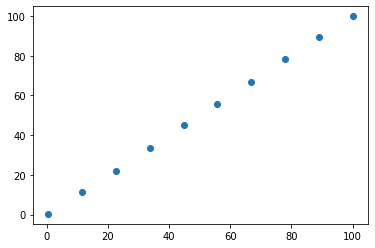

In [3]:
plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[-0.18850896  1.00373816]
Covariance Matrix (from curve_fit)
[[ 2.48206535e-02 -3.52983074e-04]
 [-3.52983074e-04  7.02454193e-06]]

Final Result: y = (1.00 +/- 0.00) x + (-0.19 +/- 0.16)


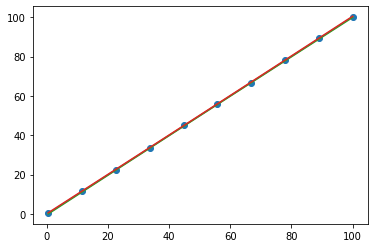

In [4]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('None')

<ErrorbarContainer object of 3 artists>

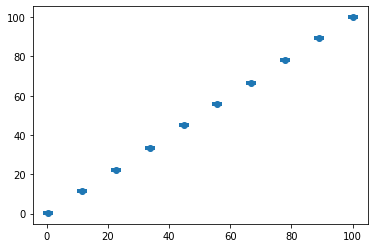

In [5]:
sigmai = np.array([0.5 for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.18850935  1.00373817]
Covariance Matrix (from curve_fit)
[[ 2.48207136e-02 -3.52984704e-04]
 [-3.52984704e-04  7.02457615e-06]]

Final Result: y = (1.00 +/- 0.00) x + (-0.19 +/- 0.16)


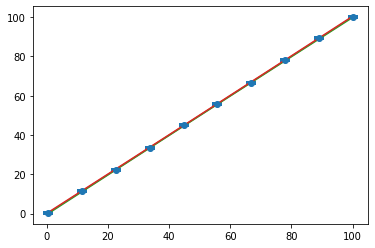

In [6]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Uniform')

<ErrorbarContainer object of 3 artists>

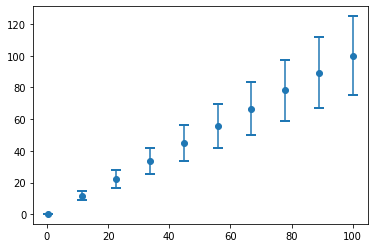

In [7]:
sigmai = np.array([0.1 + 0.25*(xi[i]-xl) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.17814575  1.00367655]
Covariance Matrix (from curve_fit)
[[ 1.47932594e-05 -4.89428070e-06]
 [-4.89428070e-06  9.10704883e-06]]

Final Result: y = (1.00 +/- 0.00) x + (-0.18 +/- 0.00)


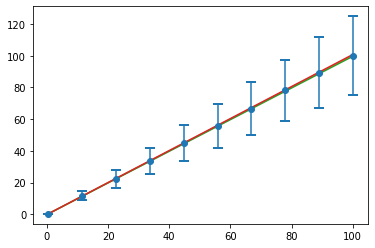

In [8]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Increasing')

<ErrorbarContainer object of 3 artists>

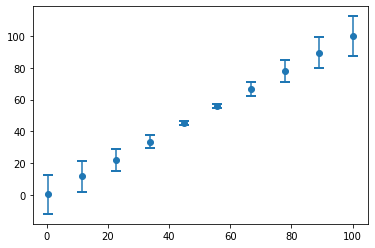

In [9]:
sigmai = np.array([0.1+ 0.25*(xi[i]-xmid) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[0.15801662 1.00038918]
Covariance Matrix (from curve_fit)
[[ 7.42351991e-02 -1.42634849e-03]
 [-1.42634849e-03  2.88306538e-05]]

Final Result: y = (1.00 +/- 0.01) x + (0.16 +/- 0.27)


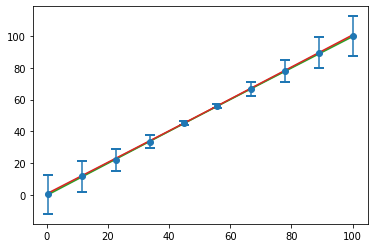

In [10]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Endpoints')

In [11]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.003738,0.002650,-0.188509,0.157546
1,Uniform,1.003738,0.002650,-0.188509,0.157546
2,Increasing,1.003677,0.003018,-0.178146,0.003846
3,Endpoints,1.000389,0.005369,0.158017,0.272461


<ErrorbarContainer object of 3 artists>

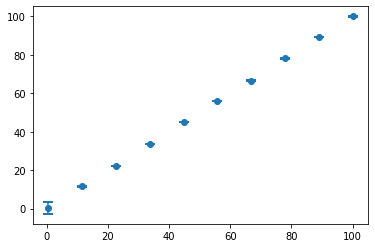

In [12]:
sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.18106919  1.00363842]
Covariance Matrix (from curve_fit)
[[ 5.50139495e-02 -7.35486596e-04]
 [-7.35486596e-04  1.14302400e-05]]

Final Result: y = (1.00 +/- 0.00) x + (-0.18 +/- 0.23)


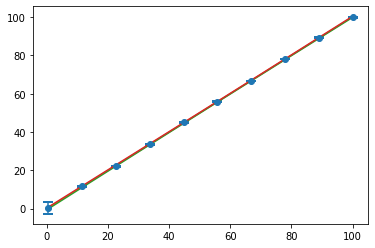

In [13]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Increasing at Small X')

In [14]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.003738,0.002650,-0.188509,0.157546
1,Uniform,1.003738,0.002650,-0.188509,0.157546
2,Increasing,1.003677,0.003018,-0.178146,0.003846
3,Endpoints,1.000389,0.005369,0.158017,0.272461
4,Increasing at Small X,1.003638,0.003381,-0.181069,0.234551


<ErrorbarContainer object of 3 artists>

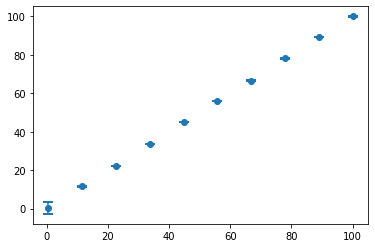

In [15]:
# create some fake data

npts = 10
xlow = 0.5
xhigh = 100.0

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yi = xi + yrandom

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.18106919  1.00363842]
Covariance Matrix (from curve_fit)
[[ 5.50139495e-02 -7.35486596e-04]
 [-7.35486596e-04  1.14302400e-05]]

Final Result: y = (1.00 +/- 0.00) x + (-0.18 +/- 0.23)


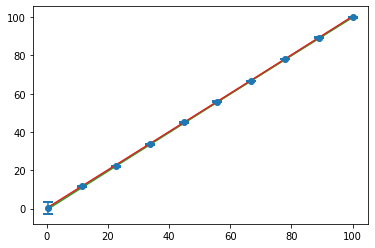

In [16]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Small X Range')

In [17]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.003738,0.002650,-0.188509,0.157546
1,Uniform,1.003738,0.002650,-0.188509,0.157546
2,Increasing,1.003677,0.003018,-0.178146,0.003846
3,Endpoints,1.000389,0.005369,0.158017,0.272461
4,Increasing at Small X,1.003638,0.003381,-0.181069,0.234551
5,Small X Range,1.003638,0.003381,-0.181069,0.234551


<ErrorbarContainer object of 3 artists>

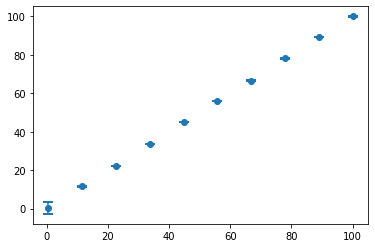

In [18]:
# create some fake data

npts = 10
xlow = 0.5
xhigh = 100.0

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yi = xi + yrandom

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.18106919  1.00363842]
Covariance Matrix (from curve_fit)
[[ 5.50139495e-02 -7.35486596e-04]
 [-7.35486596e-04  1.14302400e-05]]

Final Result: y = (1.00 +/- 0.00) x + (-0.18 +/- 0.23)


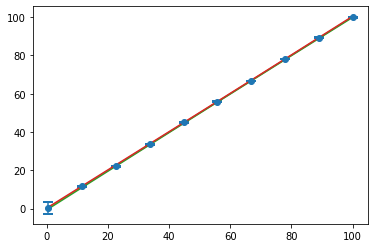

In [19]:
init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Large X Range')

In [20]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.003738,0.002650,-0.188509,0.157546
1,Uniform,1.003738,0.002650,-0.188509,0.157546
2,Increasing,1.003677,0.003018,-0.178146,0.003846
3,Endpoints,1.000389,0.005369,0.158017,0.272461
4,Increasing at Small X,1.003638,0.003381,-0.181069,0.234551
5,Small X Range,1.003638,0.003381,-0.181069,0.234551
6,Large X Range,1.003638,0.003381,-0.181069,0.234551
